# Machine Learning
### Modelos 1

Nesse notebook, testaremos a influência do número de vizinhos no desempenho de um algoritmo de machine learning. Para isso, usaremos o mesmo dataset em que avaliamos a influência do normalizador, Iris.

In [1]:
import seaborn as sns

In [5]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Dividimos os casos teste e treino

In [6]:
 from sklearn.model_selection import train_test_split
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 27

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

ATRIBUTOS = ['sepal_length', 'sepal_width', 'petal_width']
TARGET = ['petal_length']
X_treino = df_treino.reindex(ATRIBUTOS, axis=1)
y_treino = df_treino.reindex(TARGET, axis=1)

X_teste = df_teste.reindex(ATRIBUTOS, axis=1)
y_teste = df_teste.reindex(TARGET, axis=1)

Faremos o treino de algoritmo knn para 1 a 99 vizinhos:

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

RMSEl, mael = [], []

for NUM_VIZINHOS in range(1, 100):
    modelo_knn = KNeighborsRegressor(n_neighbors=NUM_VIZINHOS)
    
    modelo_knn.fit(X_treino, y_treino)
    
    from sklearn.metrics import root_mean_squared_error
    
    X_verdadeiro = X_teste
    y_verdadeiro = y_teste
    
    y_previsto = modelo_knn.predict(X_verdadeiro)
    
    RMSE = root_mean_squared_error(y_verdadeiro, y_previsto)
    mae = mean_absolute_error(y_verdadeiro, y_previsto)
    
    RMSEl.append(RMSE)
    mael.append(mae)

Agora, plotemos os gráficos para perceber o RMSE e mae de cada vizinho

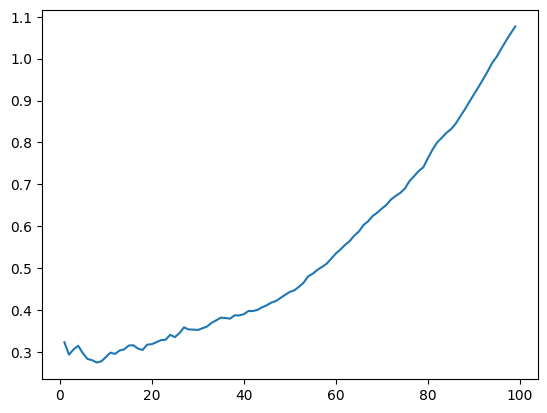

In [19]:
import matplotlib.pyplot as plt

vizinhos = range(1, 100)

plt.plot(vizinhos, RMSEl)
plt.show()

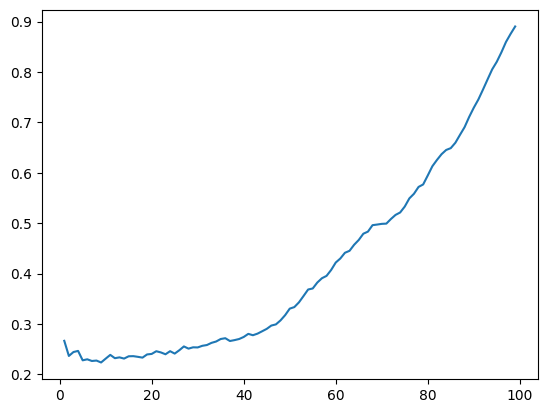

In [20]:
plt.plot(vizinhos, mael)

plt.show()

Percebemos que inicialmente, o aumento do número de vizinhos diminui o erro, porém, logo começa a aumentar similarmente a uma função exponencial. Aproximemos a visualizacão para 1 a 20:

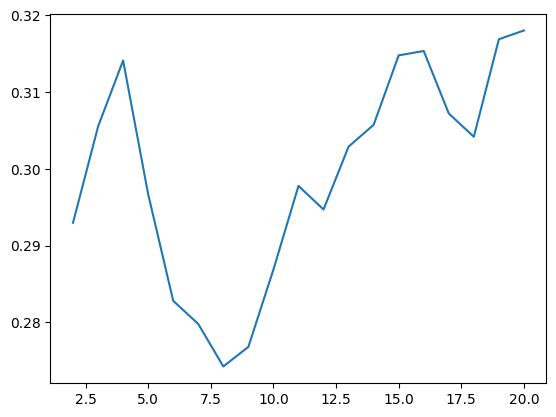

In [26]:
plt.plot(vizinhos[1:20], RMSEl[1:20])
plt.show()

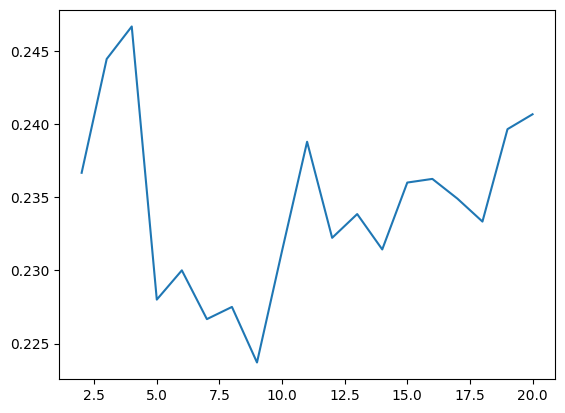

In [25]:
plt.plot(vizinhos[1:20], mael[1:20])
plt.show()

Percebemos que, no dataset com 135 dados para treino, o algoritmo teve maior desempenho para 8-9 vizinhos. Isso faz sentido, pois para muito pouco vizinho, não teria muita refência, sendo altamente sucessível a azar. Já para grandes quantidades de dado, pegamos dados muito distantes, dependendo muito da quantidade de dados e sua disposição. Um exemplo é ter 3 dados próximos e 10 distantes. Se for similar aos 3, mas colocar 10 vizinhos, vai se distanciar muito do resultado correto por alta influência dos distantes.

### Conclusão
Logo, percebemos que começando em 1 vizinho, o desempenho aumenta com o número de vizinhos até um determinado valor (no experimento 8-9) e após começa a diminuir significativamente. Assim é necessário se atentar a quantidade de vizinhos para a quantidade de dados, não escolhendo nem uma grande quantidade nem ínfima.